### Segunda parte de creando aretafactos falsos TIPO 1

In [1]:
from PIL import Image, ImageDraw, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import random

##### 8. Cambiar los colores de la traza en rojo y blanco

In [26]:

def trazas_tipo1(ruta_imagen):
    imagen = Image.open(ruta_imagen)

    ancho, alto = imagen.size

    # --------- 1. coordenadas de inicio y fin
    coordenada_inicio = (random.uniform(0, ancho), random.uniform(0, alto))
    x = random.uniform(60, 400) 
    coordenada_fin = (coordenada_inicio[0] + x, coordenada_inicio[1] + x)

    # --------- 2. parametros:
    diametro_circulo = 0.05
    separacion = 8

    # --------- 3. pendiente y la longitud de la línea
    delta_x = coordenada_fin[0] - coordenada_inicio[0]
    delta_y = coordenada_fin[1] - coordenada_inicio[1]
    longitud = np.sqrt(delta_x**2 + delta_y**2)
    pendiente = delta_y / delta_x if delta_x != 0 else float('inf')

    # --------- 4. elipses a lo largo de la línea con colores alternados entre rojo y blanco
    coordenadas = []
    colores = []
    rojo = (1, 0, 0) 
    blanco = (1, 1, 1)  # Cambiado a blanco
    alternar_color = True

    for distancia in np.arange(0, longitud + 1, separacion):
        if delta_x == 0:
            x = coordenada_inicio[0]
        else:
            x = coordenada_inicio[0] + distancia * (delta_x / longitud)

        y = coordenada_inicio[1] + pendiente * (x - coordenada_inicio[0])

        # RUIDO EN LAS COORDENADAS:
        x += np.random.normal(loc=0, scale=0.8)
        y = coordenada_inicio[1] + pendiente * (x - coordenada_inicio[0])
        y += np.random.normal(loc=0, scale=0.8)  # scale= escala el ruido como quiera

        coordenadas.append(((x), (y)))

        # --------- 5. rgb
        for distancia in np.arange(0, longitud + 1, separacion):
            if delta_x == 0:
                x = coordenada_inicio[0]
            else:
                x = coordenada_inicio[0] + distancia * (delta_x / longitud)

            y = coordenada_inicio[1] + pendiente * (x - coordenada_inicio[0])

            # RUIDO EN LAS COORDENADAS:
            x += np.random.normal(loc=0, scale=0.8)
            y = coordenada_inicio[1] + pendiente * (x - coordenada_inicio[0])
            y += np.random.normal(loc=0, scale=0.8)  # scale= escala el ruido como quiera

            coordenadas.append(((x), (y)))

            # --------- 5.1. Factor de atenuación para el brillo
            factor_atenuacion = 0.5 - (distancia / longitud)  # Factor que disminuye a medida que avanzas

            # --------- 5.2. rgb con atenuación
            if alternar_color:
                color_rgb = (
                    random.uniform(0.7, 1) * factor_atenuacion,
                    random.uniform(0, 0.3) * factor_atenuacion,
                    random.uniform(0, 0.3) * factor_atenuacion
                )
            else:
                # Cambiado a blanco
                color_rgb = (
                    1 * factor_atenuacion,
                    1 * factor_atenuacion,
                    1 * factor_atenuacion
                )

            colores.append(color_rgb)
            alternar_color = not alternar_color



    # --------- 6. pintar elipses con ruido gaussiano en los colores
    draw = ImageDraw.Draw(imagen)
    for coord, color in zip(coordenadas, colores):
        x, y = map(int, coord)
        radio = diametro_circulo / 2

        # RUIDO EN EL COLOR
        #scale: aqui añado el ruido
        color_con_ruido = tuple(int((c + np.random.normal(loc=0, scale=0)) * 255 * 0.8) for c in color) #255 * 1, si pongo <1 bajara la intensidad del color en toda la traza

        draw.ellipse([x - radio, y - radio, x + radio, y + radio], fill=color_con_ruido)

    # --------- 7. Aplicar desenfoque solo a las elipses dibujadas
    puntos_dibujados = imagen.crop((int(coordenada_inicio[0]), int(coordenada_inicio[1]), int(coordenada_fin[0]), int(coordenada_fin[1])))
    puntos_dibujados = puntos_dibujados.filter(ImageFilter.GaussianBlur(radius=0.5))  # radius, para cambiar el ruido

    # Cambiado para aplicar el desenfoque solo a las elipses dibujadas
    imagen.paste(puntos_dibujados, (int(coordenada_inicio[0]), int(coordenada_inicio[1]), int(coordenada_fin[0]), int(coordenada_fin[1])))


    plt.figure(figsize=(100, 100))
    plt.axis('off')
    plt.imshow(imagen)
    plt.show()

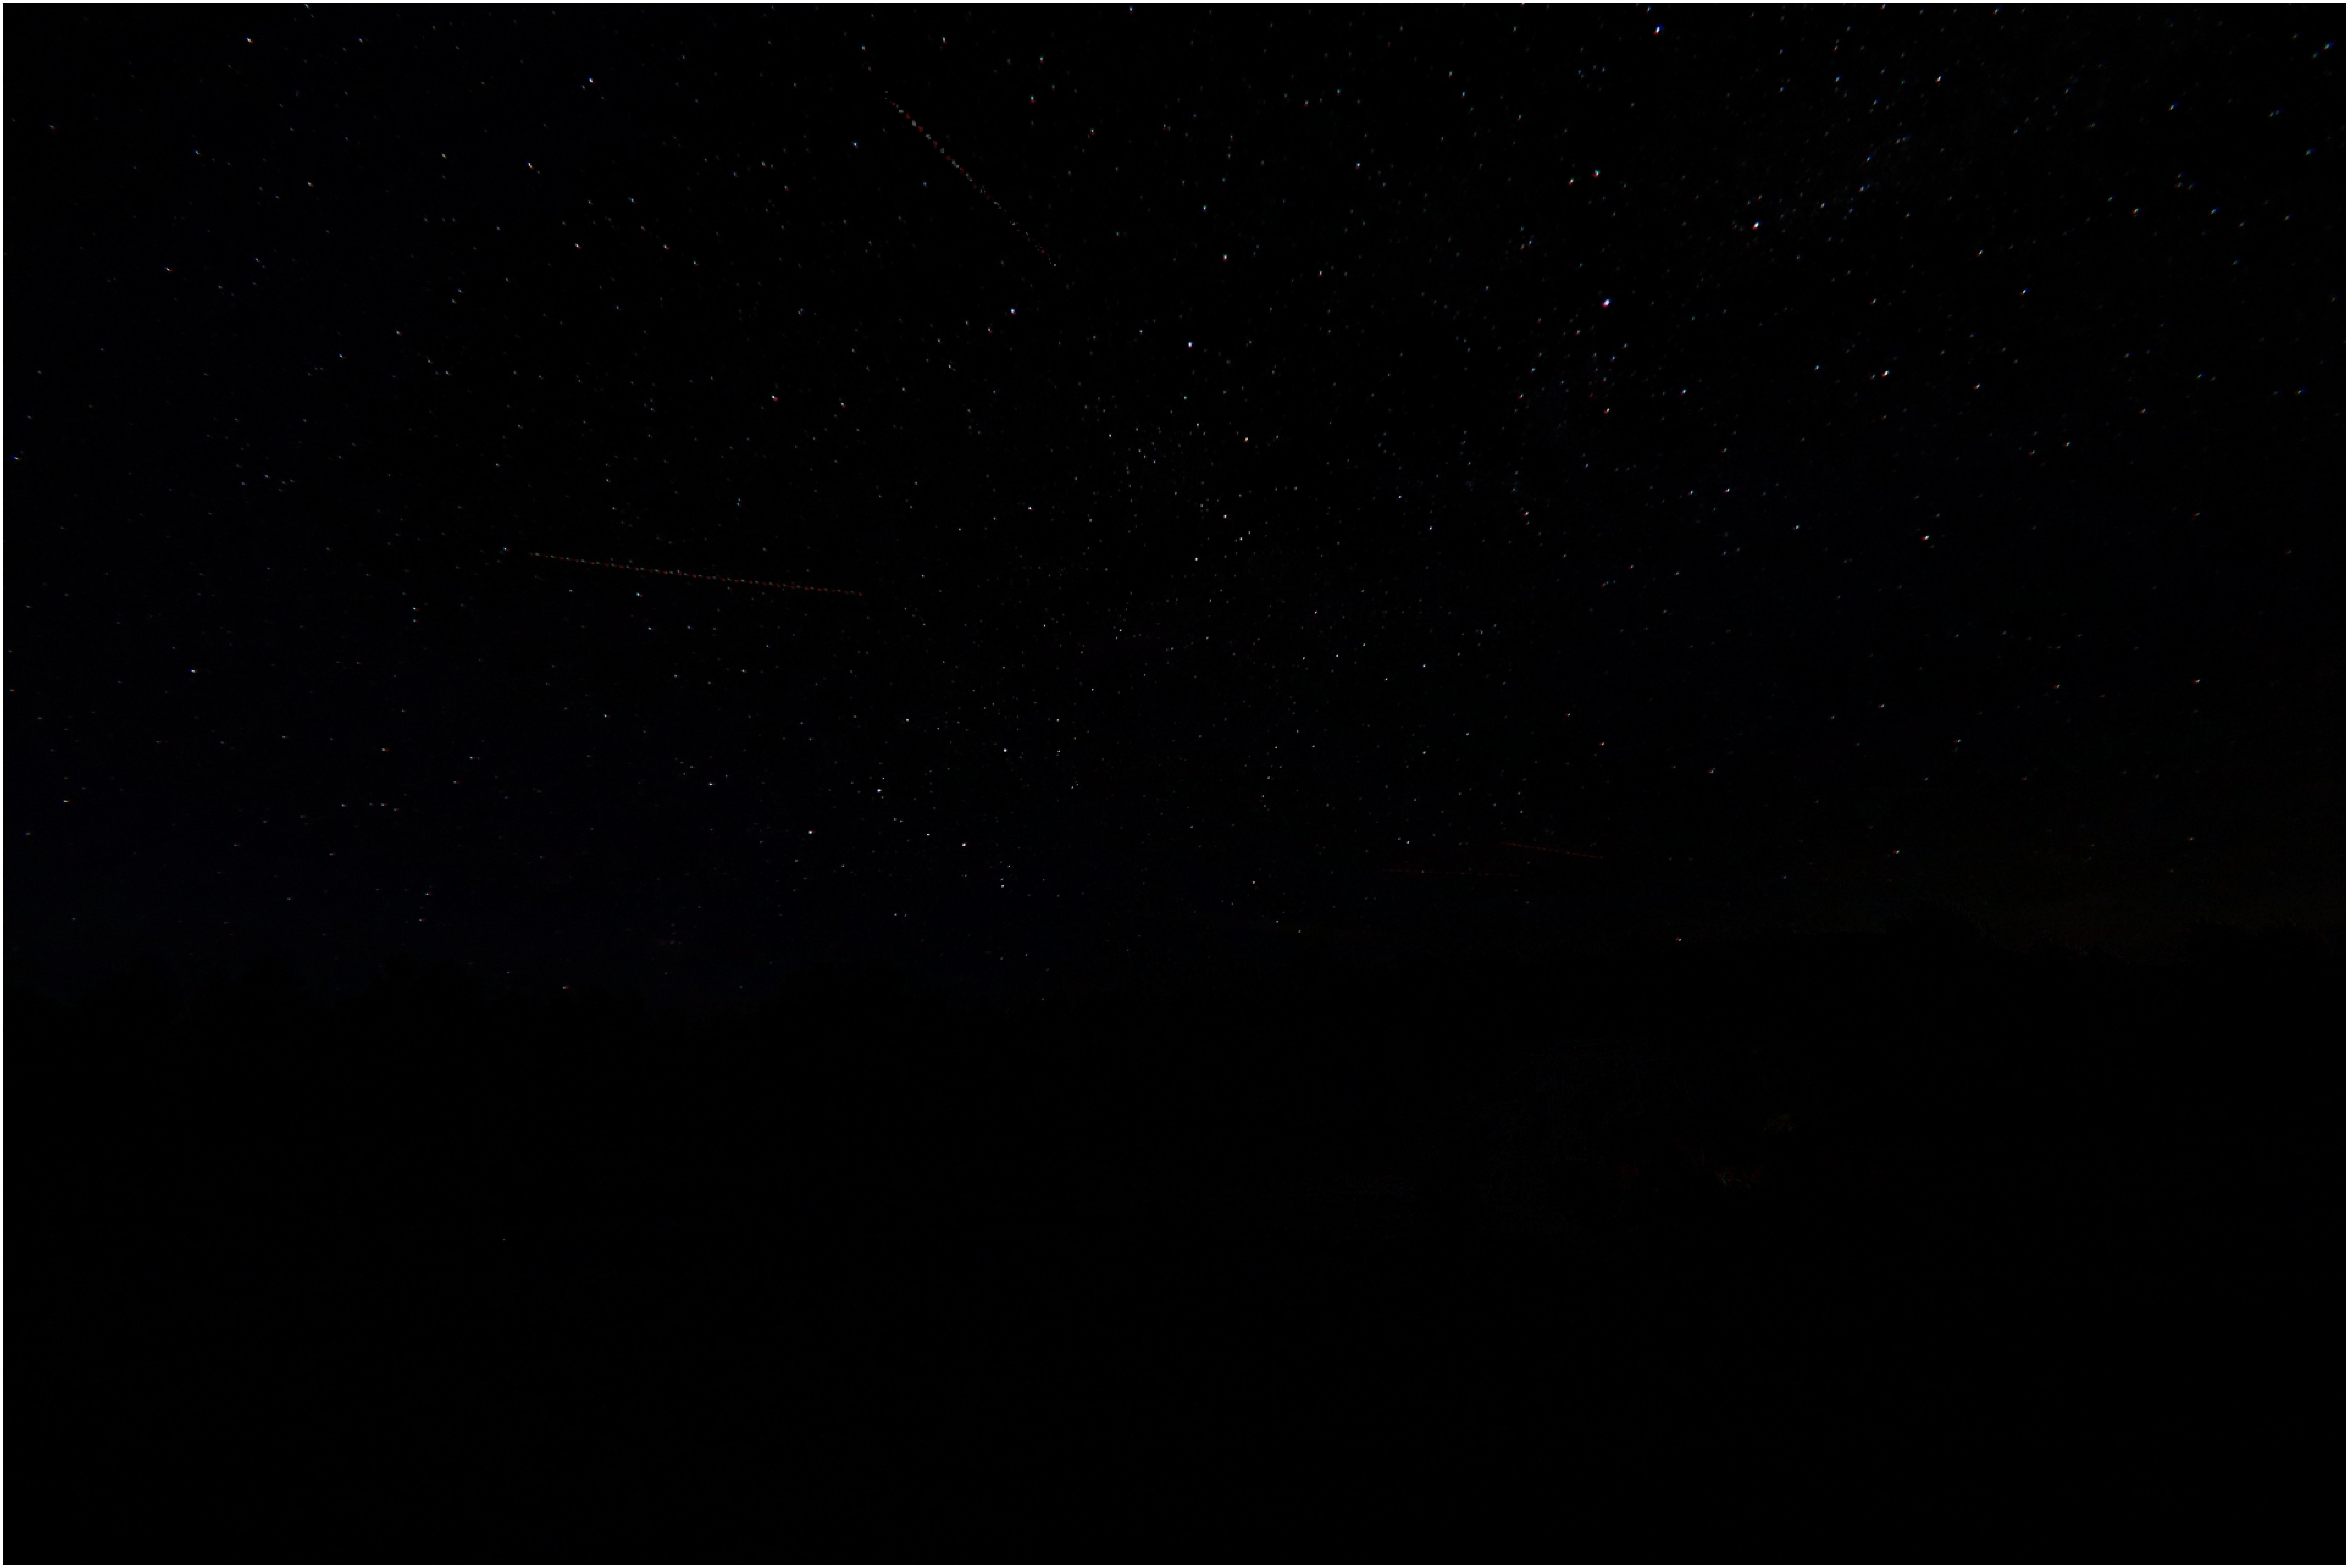

In [29]:
ruta_imagen = r"C:\circumpolar\TFG\imagenes\resta(mediana-original)\01_toni\01_toniresta_19.jpg"  
trazas_tipo1(ruta_imagen)


### SE VE MEJOR ROJO Y BLANCO, NOS QUEDAMOS CON ESTA OPCIÓN!!